## Jupyter Notebook Assessment Task

### *Learn to analyse data with Pokémon!*

[Repository Link](https://github.com/TurnipGuy30/Jupyter)

This program will do the following:

- Take data from a CSV file
- Clean and export the data
- Analyse and visualise the data

---

The first thing we should do is set up the modules we plan to use in the program. These will be used to access our database and create diagrams from the data.

In [1]:
# import modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# update matplotlib configuration for later use
plt.rcParams.update(
	{
		'font.size': 20,
		'figure.figsize': (10, 8)
	}
)

---

Now that the environment is set up, we can import our file, `pokemon.csv`.

In [3]:
# read CSV file and save to variable as DataFrame
pokemon = pd.read_csv('in/pokemon.csv')

In [4]:
# output DataFrame as table
pokemon

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,Mega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,Hoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,Hoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


---

We can see that the database is now outputting to the screen.

Running `pokemon` shows us just the start and the end of the file, but this already tells us a few things about the formatting of the data that are specific to a Pokémon database:

- Some Pokémon have alternate forms with the same `Number`.

Of course, these entries have different `index` values.

Looking at the original `pokemon.sql` file, the `PRIMARY KEY` property is given to the `Name` column. In SQL, the Primary Key property is given to a column which the programmer knows will never have duplicate values.

Because this property was given to the `Name` column, we should set that column to our `index` column.

- Some Pokémon only have one type.

There are two columns for Pokémon types: `Type_1` and `Type_2`. This is because Pokémon can have either one or two types.

However, this means that some Pokémon will have `NaN` `Type_2` values. This shouldn't make a difference to our program.

It is worth noting that for Pokémon with two types, the first type is more heaviliy weighted when it comes to game calculations.

- Each Pokémon is grouped into a `Generation` category.

This database contains Pokémon up to Gen VI, meaning that each entry will have a `Generation` value of `1` through `6`.

- Each Pokémon has six different statistics.

Hit Points, Physical Attack, Physical Defense, Special Attack, Special Defense, and Speed are used in game calculations. In general, higher stats means a stronger Pokémon.

These stats are combined in the `Total` column.

Note: in the Pokémon community, the 6 stats are abbreviated to `HP`, `ATK`, `DEF`, `SPA`, `SPD`, and `SPE`.

- Some Pokémon are `Legendary` Pokémon

Legendary Pokémon will generally have higher stats than non-Legendary Pokémon.

---

Now that we better understand out data, we can start performing the required cleaning.

Let's rename the columns to be more conventional.

In [5]:
# rename columns
pokemon.rename(columns={
	'Number': 'Dex',
	'Attack': 'ATK',
	'Defense': 'DEF',
	'Sp_Atk': 'SPA',
	'Sp_Def': 'SPD',
	'Speed': 'SPE',
	'Generation': 'Gen'
}, inplace=True)

In [6]:
# make column names lowercase
pokemon.columns = [col.lower() for col in pokemon]

In [7]:
# set index column to Name
pokemon.set_index('name', inplace=True)

---

Let's see how it's changed.

In [8]:
pokemon

,dex,type_1,type_2,total,hp,atk,def,spa,spd,spe,gen,legendary
name,,,,,,,,,,,,
Bulbasaur,1,Grass,Poison,318,45,49,49,65,65,45,1,False
Ivysaur,2,Grass,Poison,405,60,62,63,80,80,60,1,False
Venusaur,3,Grass,Poison,525,80,82,83,100,100,80,1,False
Mega Venusaur,3,Grass,Poison,625,80,100,123,122,120,80,1,False
Charmander,4,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
Diancie,719,Rock,Fairy,600,50,100,150,100,150,50,6,True
Mega Diancie,719,Rock,Fairy,700,50,160,110,160,110,110,6,True
Hoopa Confined,720,Psychic,Ghost,600,80,110,60,150,130,70,6,True


Looking good! Let's move on.

---

It's always a good idea to check for empty data.

In [9]:
# show sum of NaN data
pokemon.isnull().sum()

dex            0
type_1         0
type_2       386
total          0
hp             0
atk            0
def            0
spa            0
spd            0
spe            0
gen            0
legendary      0
dtype: int64

We can see that the only column containing empty data is `type_2`. This is the expected result.

Now that the data is organised, we can export the file before moving on to visualisation.

In [10]:
# export DataFrame to file
pokemon.to_csv('out/pokemon.csv')

---

Let's start visualising pieces of data.

Visualisation can help to point out certain parts of a database. Look at the following diagram.

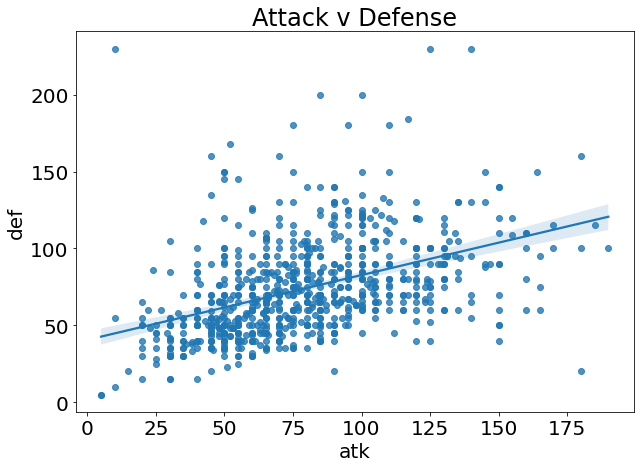

In [11]:
# correlation between Attack and Defense stats.
fig = plt.figure(figsize=(10, 7))
sns.regplot(x=pokemon['atk'], y=pokemon['def']);
plt.title('Attack v Defense');

The diagram easily conveys that the average Pokémon's Defense is double their Attack.

I will now find the Pokémon with Attack greater than 175 and Defense greater than 100.

In [12]:
# search for multiple conditions
pokemon[
	(pokemon['atk'] >= 175) &
	(pokemon['def'] >= 100)
].head()

,dex,type_1,type_2,total,hp,atk,def,spa,spd,spe,gen,legendary
name,,,,,,,,,,,,
Mega Mewtwo X,150,Psychic,Fighting,780,106,190,100,154,100,130,1,True
Mega Heracross,214,Bug,Fighting,600,80,185,115,40,105,75,2,False
Primal Groudon,383,Ground,Fire,770,100,180,160,150,90,90,3,True
Mega Rayquaza,384,Dragon,Flying,780,105,180,100,180,100,115,3,True


This can be useful information to Pokémon players who want to form the best team for Pokémon battles; High-Attack Pokémon are valuable, and the Pokémon with the best (physical) stats are listed above.

A Pokémon player could then use this information on top of their prior knowledge to form a team of strong Pokémon.

I will now demonstrate this by doing it myself, though I'll need some more information.

Note: a Pokémon team is comprised of up to six individual Pokémon.

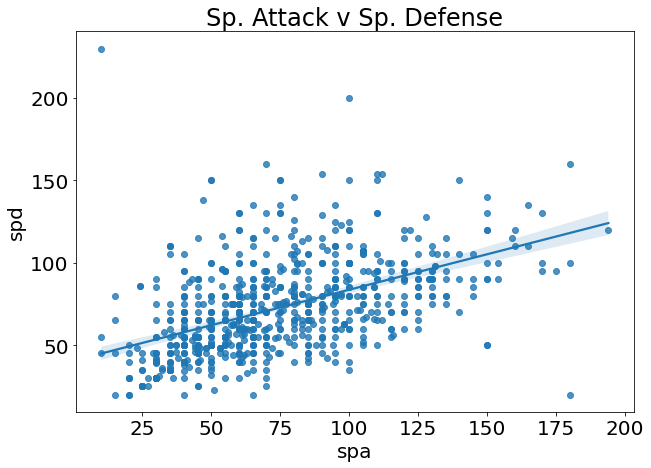

In [13]:
# correlation data from columns
fig = plt.figure(figsize=(10, 7))
sns.regplot(x=pokemon['spa'], y=pokemon['spd']);
plt.title('Sp. Attack v Sp. Defense');

Look at the diagram below.

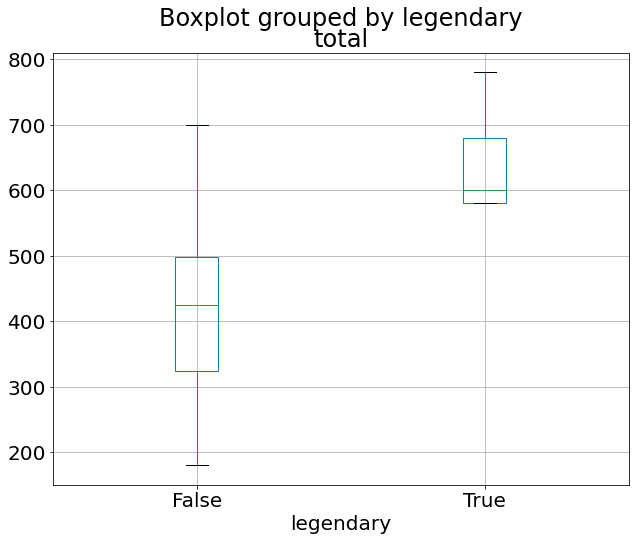

In [14]:
# stats of Legendary Pokémon compared to normal Pokémon
pokemon.boxplot(column='total', by='legendary');

This diagram shows the total stats of Legendary Pokémon compared to non-Legendary Pokémon. This proves that if we team with the highest stats, we should, in general, use as many Legendary Pokémon as possible.

In [15]:
# search for many conditions
pokemon[
	(
		(pokemon['atk'] >= 175) &
		(pokemon['def'] >= 100)
	) |
	(
		(pokemon['spa'] >= 175) &
		(pokemon['spd'] >= 100)
	)
].head()

,dex,type_1,type_2,total,hp,atk,def,spa,spd,spe,gen,legendary
name,,,,,,,,,,,,
Mega Mewtwo X,150,Psychic,Fighting,780,106,190,100,154,100,130,1,True
Mega Mewtwo Y,150,Psychic,NaN,780,106,150,70,194,120,140,1,True
Mega Heracross,214,Bug,Fighting,600,80,185,115,40,105,75,2,False
Primal Kyogre,382,Water,NaN,770,100,150,90,180,160,90,3,True
Primal Groudon,383,Ground,Fire,770,100,180,160,150,90,90,3,True


According to this data, Mewtwo, Heracross, Kyogre, and Groudon are among the best choices. This team covers some of their own weaknesses, but seems vulnerable to Psychic-Type Pokémon. Therefore, it could benefit from having a Dark-Type Pokémon included.

In [16]:
# search by condition and sort
pokemon[
	(pokemon['type_1'] == 'Dark') 
].sort_values('total', ascending=False).head()

,dex,type_1,type_2,total,hp,atk,def,spa,spd,spe,gen,legendary
name,,,,,,,,,,,,
Yveltal,717,Dark,Flying,680,126,131,95,131,98,99,6,True
Mega Houndoom,229,Dark,Fire,600,75,90,90,140,90,115,2,False
Hydreigon,635,Dark,Dragon,600,92,105,90,125,90,98,5,False
Darkrai,491,Dark,NaN,600,70,90,90,135,90,125,4,True
Mega Absol,359,Dark,NaN,565,65,150,60,115,60,115,3,False


Yveltal seems like a good fit, but is vulnerable to Electric-Type Pokémon. However, this is covered by Groudon being a Ground-Type.

I'll add a Steel-Type Pokémon because they don't have many weaknesses.

In [17]:
# search by condition and sort
pokemon[
	(pokemon['type_1'] == 'Steel')
].sort_values('total', ascending=False).head()

,dex,type_1,type_2,total,hp,atk,def,spa,spd,spe,gen,legendary
name,,,,,,,,,,,,
Mega Metagross,376,Steel,Psychic,700,80,145,150,105,110,110,3,False
Dialga,483,Steel,Dragon,680,100,120,120,150,100,90,4,True
Mega Aggron,306,Steel,NaN,630,70,140,230,60,80,50,3,False
Mega Steelix,208,Steel,Ground,610,75,125,230,55,95,30,2,False
Jirachi,385,Steel,Psychic,600,100,100,100,100,100,100,3,True


I'll choose Metagross. Now our team looks like this.

In [18]:
# locate multiple entries
pokemon.loc[
	['Mewtwo', 'Heracross', 'Kyogre', 'Groudon', 'Yveltal', 'Metagross']
]

,dex,type_1,type_2,total,hp,atk,def,spa,spd,spe,gen,legendary
name,,,,,,,,,,,,
Mewtwo,150,Psychic,NaN,680,106,110,90,154,90,130,1,True
Heracross,214,Bug,Fighting,500,80,125,75,40,95,85,2,False
Kyogre,382,Water,NaN,670,100,100,90,150,140,90,3,True
Groudon,383,Ground,NaN,670,100,150,140,100,90,90,3,True
Yveltal,717,Dark,Flying,680,126,131,95,131,98,99,6,True
Metagross,376,Steel,Psychic,600,80,135,130,95,90,70,3,False


This is just one example of practical data analysis.

---

###### *Fin.*